In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib import colors as mcolors

from utils import *

In [3]:
tool_list=["arcas","hlaforest","optitype","phlat","rna2hla","seq2hla",'hlavbseq',"hlahd",'T1K','hisat']

sns.set_context("paper")
sns.set(font_scale=2)
sns.set_style("white")


In [4]:
missed_alleles = []
all_alleles = []

for t in tool_list:
    for i in range(1,7):
        gs=pd.read_csv(f"../datasets/{i}_gs.csv")
        pre=pd.read_csv(f"../results/standard/{t}_d{i}.csv")
    
        ret = get_miscalled_and_all_alleles(pre,gs)
        missed_alleles.extend(ret[0])
        all_alleles.extend(ret[1])

missed_counts = Counter(missed_alleles)
total_counts = Counter(all_alleles)


In [5]:
df = []
for k in total_counts.keys():
    try:
        df.append([k,total_counts[k],missed_counts[k], (missed_counts[k]/total_counts[k])])
    except:
        df.append([k,total_counts[k],0,0])
        
df = pd.DataFrame(df,columns=['allele','all','missed','rate'])
df = df.sort_values(by=['rate'],ascending=False)
df = df.drop(index=[3]) # drop error
df = df[df.rate != 0] # drop all zeros... comment out if you want to keep completely accurate alleles in plot
df

,allele,all,missed,rate
153,B*67:01,10,3,0.300000
145,DQB1*05:04,20,5,0.250000
129,DRB1*15:02,20,5,0.250000
83,DQB1*06:05,70,15,0.214286
157,DRB1*13:21,10,2,0.200000
...,...,...,...,...
18,A*03:01,1700,11,0.006471
75,C*02:02,470,3,0.006383
4,C*06:02,970,6,0.006186
90,A*33:03,170,1,0.005882


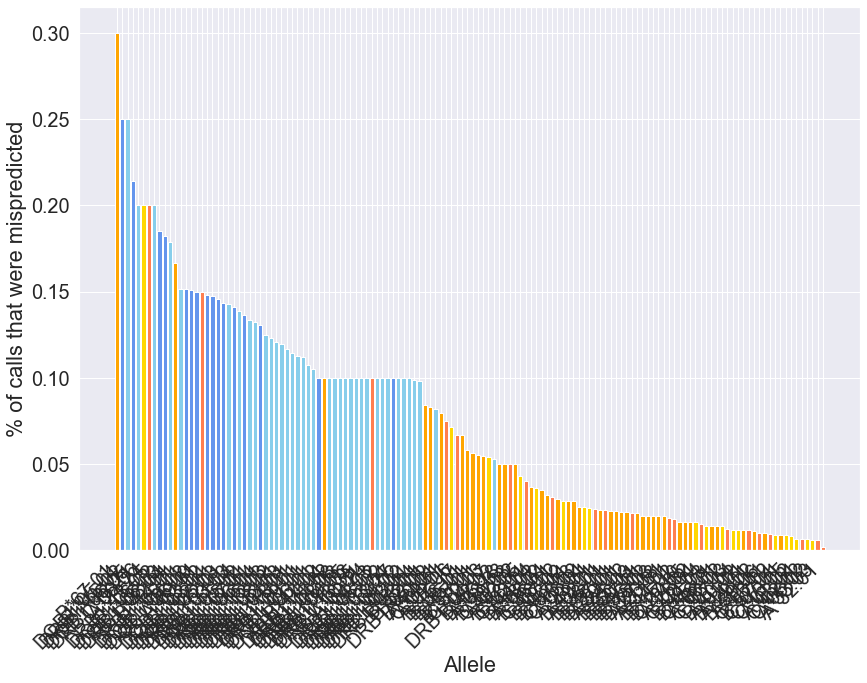

In [6]:
alleles = np.array(df['allele'])
accuracy = np.array(df['rate'])
color = []

# determine what color for each bar
for a in alleles:
    if (a[0]=='A'):
        color.append(palette[3])
    if (a[0]=='B'):
        color.append(palette[4])
    if (a[0]=='C'):
        color.append(palette[5])
    if (a[0:2]=='DR'):
        color.append(palette[6])
    if (a[0:2]=='DQ'):
        color.append(palette[7])

xaxis = np.arange(len(alleles))
 
plt.figure(figsize = (14,10))

plt.bar(xaxis, accuracy.astype(float),color=color)
plt.xticks(xaxis,alleles,rotation=45, ha='right')
plt.xlabel("Allele")
plt.ylabel("% of calls that were mispredicted")


plt.show()

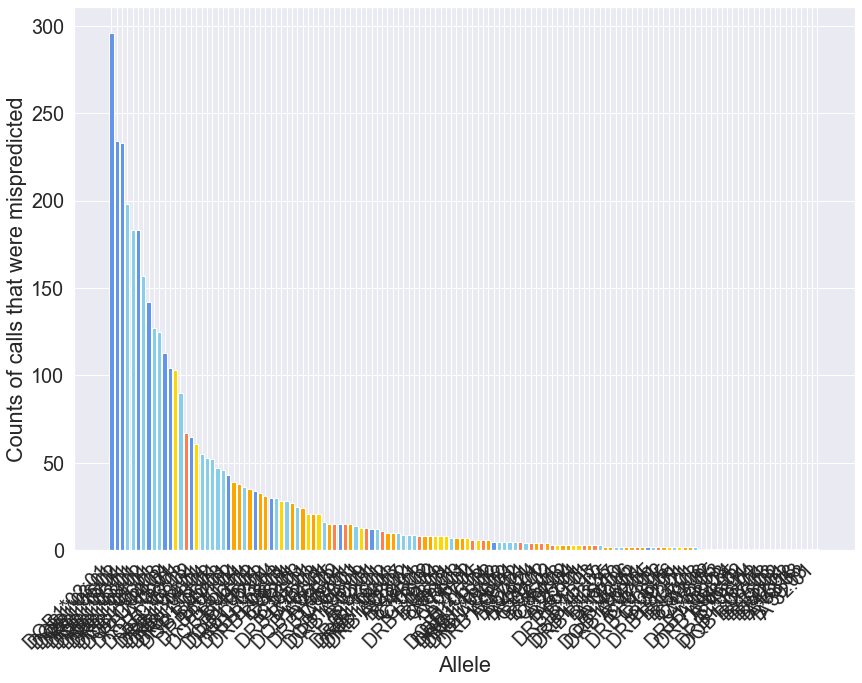

In [7]:
# plotting counts
df = df.sort_values(by=['missed'],ascending=False)

alleles = np.array(df['allele'])
count = np.array(df['missed'])
color = []

# determine what color for each bar
for a in alleles:
    if (a[0]=='A'):
        color.append(palette[3])
    if (a[0]=='B'):
        color.append(palette[4])
    if (a[0]=='C'):
        color.append(palette[5])
    if (a[0:2]=='DR'):
        color.append(palette[6])
    if (a[0:2]=='DQ'):
        color.append(palette[7])

xaxis = np.arange(len(alleles))
 
plt.figure(figsize = (14,10))

plt.bar(xaxis, count.astype(float),color=color)
plt.xticks(xaxis,alleles,rotation=45, ha='right')
plt.xlabel("Allele")
plt.ylabel("Counts of calls that were mispredicted")



plt.show()